In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.size']=15

### Reading and Understanding the data

#### This data has been taken from UCI open Dataset and has been read using the read_csv function

In [3]:
url = r"https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
df = pd.read_csv(url,encoding='latin1')

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.drop("name",axis=1,inplace=True)

In [6]:
df.shape

(195, 23)

The name column is just the subject name and recording number which is not relevent to our model so removing number

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

All the columns are of numerical dtype

In [8]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
df_new = df.copy() # Creating a copy for comparision purpose

### Data PreProcessing

In [10]:
# Calculating the null values present
df.isna().sum(axis=0)

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

<b>Insights:</b>
There are no null values in the dataset

In [11]:
# Checking for the duplicate values
df_new.drop_duplicates(subset=None,keep='first',inplace=True)

In [12]:
print(f"Shape before dropping duplicates: {df.shape} ")
print(f"Shape after dropping duplicates: {df_new.shape} ")

Shape before dropping duplicates: (195, 23) 
Shape after dropping duplicates: (195, 23) 


There are no duplicates in the dataset as the shape before and after dropping the duplicate is same

In [13]:
# Checking for the garbage values 
for col in df.columns:
    print(df[col].value_counts().sort_values(ascending=False))


119.992    1
122.964    1
91.904     1
116.682    1
116.676    1
          ..
201.774    1
174.188    1
209.516    1
174.688    1
214.289    1
Name: MDVP:Fo(Hz), Length: 195, dtype: int64
157.302    1
130.049    1
115.871    1
131.111    1
137.871    1
          ..
262.707    1
230.978    1
253.017    1
240.005    1
260.277    1
Name: MDVP:Fhi(Hz), Length: 195, dtype: int64
74.997     1
114.676    1
86.292     1
111.555    1
111.366    1
          ..
78.228     1
94.261     1
89.488     1
74.287     1
77.973     1
Name: MDVP:Flo(Hz), Length: 195, dtype: int64
0.00694    3
0.00369    3
0.00742    3
0.00462    2
0.00968    2
          ..
0.01360    1
0.00740    1
0.00517    1
0.00339    1
0.00567    1
Name: MDVP:Jitter(%), Length: 173, dtype: int64
0.000030    46
0.000040    28
0.000020    28
0.000010    20
0.000050    17
0.000060    16
0.000080     9
0.000070     8
0.000009     5
0.000090     5
0.000100     3
0.000110     2
0.000150     2
0.000007     1
0.000260     1
0.000120     1
0.0

There are no garbage values in the dataset

There are no categorical columns in the dataset, so no need to convert any columns into categorical columns

In [14]:
inference = df.groupby("status").mean()
inference

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


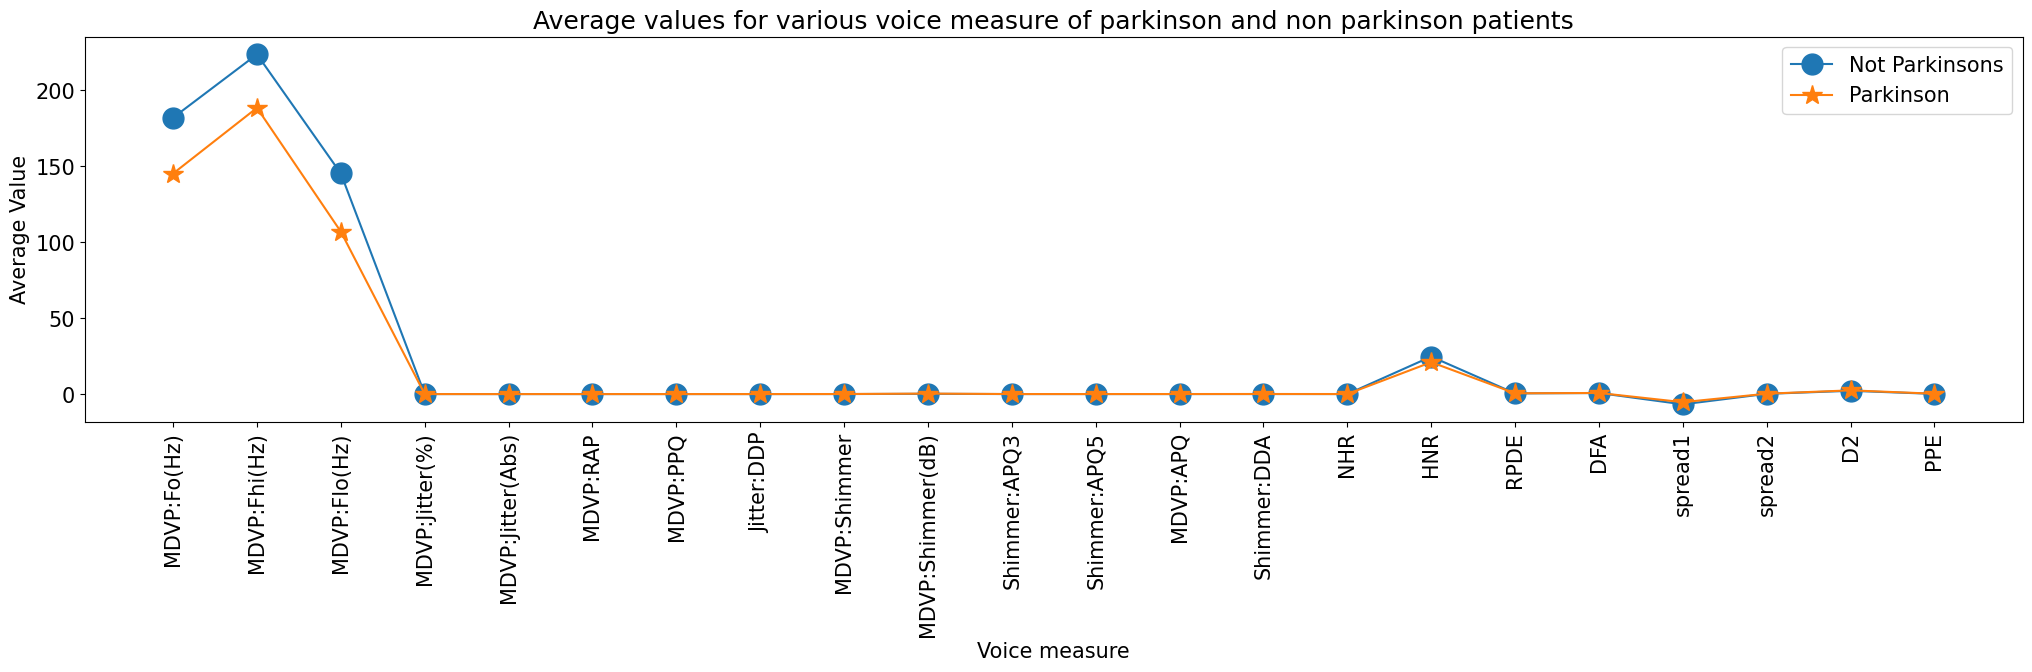

In [15]:
plt.figure(figsize=(25,5))
plt.plot(inference.iloc[0,:],marker="o",markersize=15,label="Not Parkinsons")
plt.plot(inference.iloc[1,:],marker="*",markersize=15,label="Parkinson")
plt.xticks(rotation=90)
plt.xlabel("Voice measure")
plt.ylabel("Average Value")
plt.title("Average values for various voice measure of parkinson and non parkinson patients")
plt.legend();

In [16]:
X = df.drop(["status"],axis=1).copy()
y = df["status"].copy()

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

## FEATURE SELECTION

## Filter Methods

#### Information Gain

In [18]:
# This function takes X , y and threshold as input and returns the features with information gain greater than threshold
def informatio_gain(X,y,threshold):
    from sklearn.feature_selection import mutual_info_classif
    importances = mutual_info_classif(X,y)
    feature_importance = pd.Series(importances,X.columns)
    # Returns the feature with maximum to mimimum importance
    return feature_importance>threshold

#### Chi squared Score

In [19]:
def chiSquared(X,y):
    from sklearn.feature_selection import chi2
    from sklearn.feature_selection import SelectKBest
    # 15 features with highest chi2 are selected
    chi2_features = SelectKBest(chi2, k =15)
    X_best_features = chi2_features.fit_transform(X,y)
    return X_best_features

#### Fisher's Score

In [20]:
def FisherScore(X,y):
    from skfeature.function.similarity_based import fischer_score
    # Calculating scores
    ranks = fisher_score.fisher_score(X,y)
    # Plotting the ranks
    feature_importances = pd.Series(ranks,X.columns)
    return feature_importances

#### Variance Threshold

In [21]:
def varianceThreshold(X,y,threshold):
    from sklearn.feature_selection import VarianceThreshold
    from sklearn.preprocessing import MinMaxScaler
    X_scaled = MinMaxScaler().fit_transform(X)
    sel = VarianceThreshold(threshold=threshold)
    sel.fit(X)
    return sel.get_support()

#### GridSearchCV

In [22]:
def gridsearchCV(estimator,features_,):
    from sklearn.model_selection import GridSearchCV
    gridSearchModel = GridSearchCV(estimator,features_,verbose = 1)
    return gridSearchModel

## Wrapper Methods

#### Exhaustive Feature Selection

In [23]:
def exhaustive():
    from mlxtend.feature_selection import SequentialFeatureSelector
    from mlxtend.feature_selection import ExhaustiveFeatureSelector


## MODELS

#### KNN

In [ ]:
def kneighbors(X,y):

#### Random Forest

#### Logistic Model

In [24]:
def logistic():
    Logisticmodel = LogisticRegression()
    features_ = dict(C = [0.001,0.01,0.1,1,10,100],
                     solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                     max_iter=[10000])
    model = gridsearchCV(Logisticmodel,features_)
    return model

#### Decision Tree

In [25]:
def tree():
    # Making prediction with Decision Tree Classifier
    dtc = DecisionTreeClassifier(random_state=0)
    features_ = dict(criterion = ["gini","entropy","log_loss"],
                     max_depth = np.arange(1,100,1),
                     random_state=[0])
    model = gridsearchCV(dtc,features_)
    return model

#### Support Vector Machines

In [26]:
def svm():
    svmmodel = SVC()
    features_ = dict(C = [0.001,0.01,0.1,1,10,100],
                     kernel=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                     random_state = [0])
    model = gridsearchCV(svmmodel,features_)
    return model

#### Gaussian Naive Bayes

In [27]:
def naive():
    # Making prediction with naive bayes model
    gnb = GaussianNB()
    return gnb

#### Hard Voting Classifier

In [28]:
def hardVoting():
    # Using a voting classifier
    # Creating voting classifier with soft voiting
    votingClassifierHard = VotingClassifier(estimators=[("dtc",DecisionTreeClassifier(random_state=0)),
                                                ("lr",LogisticRegression()),
                                                ("gnb",GaussianNB())],
                                                voting="hard")

#### Soft Voting Classifier

In [29]:
# Creating a voting classifier with hard voting
votingClassifierSoft = VotingClassifier(estimators=[("dtc",DecisionTreeClassifier(random_state=0)),
                                                ("lr",LogisticRegression()),
                                                ("gnb",GaussianNB())],
                                                voting="soft")

## Analysis

In [30]:
def analysis(model,X_test,y_test):
    from sklearn.metrics import f1_score,accuracy_score
    return f1_score(y_test,model.predict(X_test)), accuracy_score(y_test,model.predict(X_test))

#### MODEL SELECTION
This section will split the dataset into train and test and create a dataframe for the scoring

In [31]:
def modelSelection(X,y):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)
    return X_train,X_test,y_train,y_test

In [32]:
# Creating a dataframe for various results
result_ = pd.DataFrame(columns=["model","method","n_features","f1Score","accuracy"])
def result(model,feature_selection_method,f1_score,accuracy,n_features):
    result_.loc[len(result_.index)] = [model,feature_selection_method,n_features,f1_score,accuracy]

### -------VARIANCE THRESHOLD AND MODELS

Outline of how the calculation is being performed
1. Calling one of the <b>feature selection</b> function to fit the feature and stroing in a variable  say <b>"A"</b>
2. Adding the selected features <b>sum(A)</b>
3. Masking the selected feature from the main dataframe
4. Splitting the data into training and testing
5. Applying the model by calling the respective function with training dataset and string in a variable say "B"
6. printing the best parameters gained using grid search cd
7. Calling the <b>analysis</b> function to calculate the f1 score and accuracy of the model
8. Finally calling the result function to make a dataframe about the scoring

In [33]:
def mainVarianceThresholding(X,y):
    if __name__=="__main__":
        selectedColumns = varianceThreshold(X,y,0.005) #Calling variance threshodl function to return selected feature mask
        n_features = sum(selectedColumns)
        X_new = X[X.columns[selectedColumns]] # Selecting the features with the help of mask
        X_train,X_test,y_train,y_test = modelSelection(X_new,y) # Calling the model selection function to split the model
        
        logisticModel = logistic().fit(X_train,y_train) # Calling the logistic function to return logistic model
        treeModel = tree().fit(X_train,y_train)
    # svmModel = svm().fit(X_train,y_train)
        naiveModel = naive().fit(X_train,y_train)

        f1_score_logistic, accuracy_logistic = analysis(logisticModel,X_test,y_test)
        result("LogisticRegression","varianceThreshold",f1_score_logistic,accuracy_logistic,n_features) # Creating a dataframe for the model

        f1_score_tree, accuracy_tree = analysis(treeModel,X_test,y_test)
        result("Decison Tree","varianceThreshold",f1_score_tree,accuracy_tree,n_features)

        #result("Decison Tree","varianceThreshold",analysis(svmModel,X_test,y_test))

        f1_score_naive, accuracy_naive = analysis(naiveModel,X_test,y_test)

        result("Naive Bayes","varianceThreshold",f1_score_naive,accuracy_naive,n_features)
mainVarianceThresholding(X,y)
        

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 297 candidates, totalling 1485 fits


In [34]:
result_

,model,method,n_features,f1Score,accuracy
0,LogisticRegression,varianceThreshold,10,0.877193,0.820513
1,Decison Tree,varianceThreshold,10,0.925926,0.897436
2,Naive Bayes,varianceThreshold,10,0.862745,0.820513


In [35]:
def mainInformationGain(X,y):
    if __name__=="__main__":
        # Information Gain
        selectedColumns = informatio_gain(X,y,0.1) #Selecting the columns whose information gain is > 0.1
        n_features = sum(selectedColumns)
        X_new = X[X.columns[selectedColumns]] # Selecting the features with the help of mask
        X_train,X_test,y_train,y_test = modelSelection(X_new,y) # Calling the model selection function to split the model
        
        logisticModel = logistic().fit(X_train,y_train) # Calling the logistic function to return logistic model
        treeModel = tree().fit(X_train,y_train)
    # svmModel = svm().fit(X_train,y_train)
        naiveModel = naive().fit(X_train,y_train)

        f1_score_logistic, accuracy_logistic = analysis(logisticModel,X_test,y_test)
        result("LogisticRegression","Information gain",f1_score_logistic,accuracy_logistic,n_features) # Creating a dataframe for the model

        f1_score_tree, accuracy_tree = analysis(treeModel,X_test,y_test)
        result("Decison Tree","Information gain",f1_score_tree,accuracy_tree,n_features)

        #result("Decison Tree","varianceThreshold",analysis(svmModel,X_test,y_test))

        f1_score_naive, accuracy_naive = analysis(naiveModel,X_test,y_test)

        result("Naive Bayes","Information gain",f1_score_naive,accuracy_naive,n_features)
mainInformationGain(X,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 297 candidates, totalling 1485 fits


In [36]:
result_

,model,method,n_features,f1Score,accuracy
0,LogisticRegression,varianceThreshold,10,0.877193,0.820513
1,Decison Tree,varianceThreshold,10,0.925926,0.897436
2,Naive Bayes,varianceThreshold,10,0.862745,0.820513
3,LogisticRegression,Information gain,17,0.933333,0.897436
4,Decison Tree,Information gain,17,0.830189,0.769231
5,Naive Bayes,Information gain,17,0.711111,0.666667
